# Problem Statemen:

Banks wants to know whether credit facility will extend to the customer based on the customer data, for this analysis, bank is using individual customer geography details, gender, income, industry employment and experience.

Using Chi2_square_test and ANOVA test and different ML algorithym, we are trying to predict the credit card approval.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import stat
import pickle
from scipy.stats import iqr

In [63]:
#Read the dataset
df=pd.read_csv(r"C:\Users\User\Documents\Machine Learning Projects\clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [64]:
#check the datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [65]:
#check null values in the dataset
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [66]:
#check the mean,mode, standard deviation
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [67]:
#check the value counts for each parameters
for i in df:
 print(df[i].value_counts())

1    480
0    210
Name: Gender, dtype: int64
28.46    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: Debt, Length: 215, dtype: int64
1    525
0    165
Name: Married, dtype: int64
1    527
0    163
Name: BankCustomer, dtype: int64
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64
White     408
Black     138
Asian      59
Latino     57
Other      28
Nam

In [68]:
#create the list of categorical type variables
category=['Gender','Married','BankCustomer','Industry','Ethnicity','PriorDefault','Employed',
 'DriversLicense','Citizen','ZipCode','Approved']

In [69]:
df.loc[:,category]

,Gender,Married,BankCustomer,Industry,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
0,1,1,1,Industrials,White,1,1,0,ByBirth,202,1
1,0,1,1,Materials,Black,1,1,0,ByBirth,43,1
2,0,1,1,Materials,Black,1,0,0,ByBirth,280,1
3,1,1,1,Industrials,White,1,1,1,ByBirth,100,1
4,1,1,1,Industrials,White,1,0,0,ByOtherMeans,120,1
...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,Education,Black,0,0,0,ByBirth,260,0
686,0,1,1,Energy,White,0,1,1,ByBirth,200,0
687,0,0,0,Healthcare,Latino,0,1,1,ByBirth,200,0
688,1,1,1,ConsumerStaples,White,0,0,0,ByBirth,280,0


# Statistical Testing using Chisquare:

In [70]:
import colorama
from colorama import Fore

Gender:


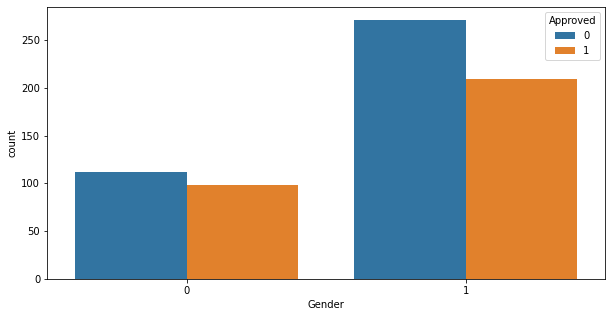

'Gender'is a 'bad Predictor'
p_val=0.44723087514133186

Married:


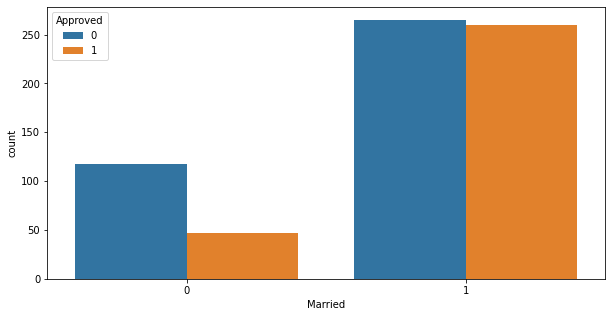

'Married' is a Good Predictor
p_val=2.100231920165588e-06

BankCustomer:


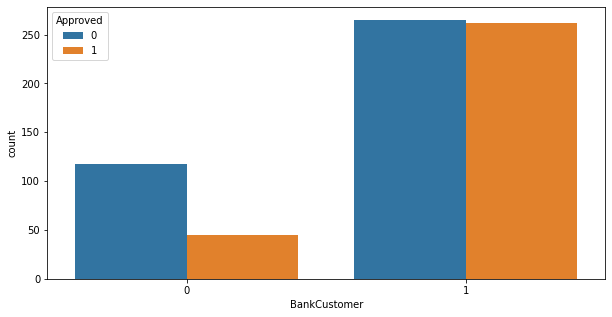

'BankCustomer' is a Good Predictor
p_val=6.91661320541803e-07

Industry:


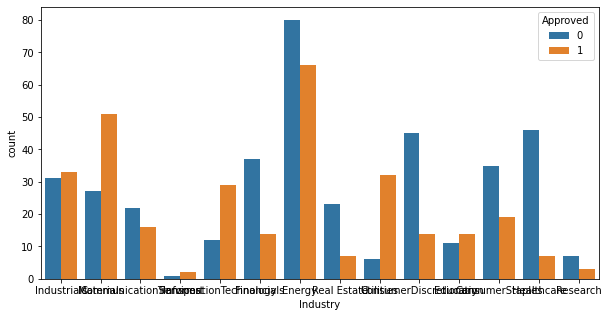

'Industry' is a Good Predictor
p_val=3.502987066102042e-15

Ethnicity:


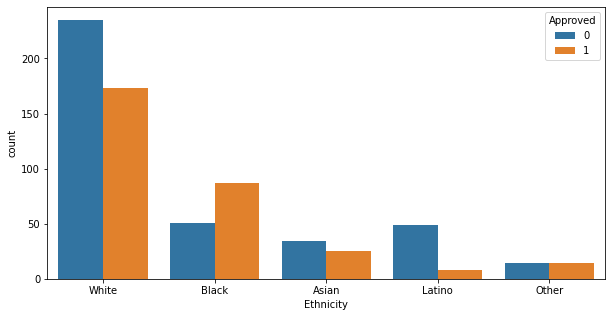

'Ethnicity' is a Good Predictor
p_val=1.8236656549346847e-08

PriorDefault:


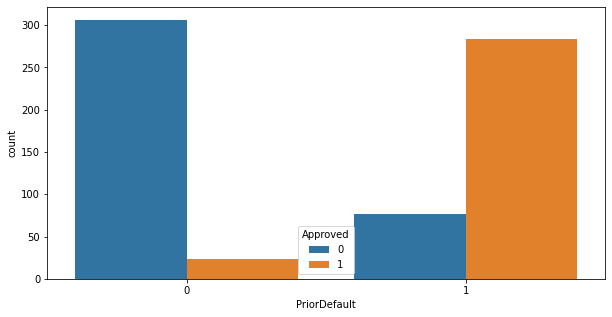

'PriorDefault' is a Good Predictor
p_val=7.298530125411298e-80

Employed:


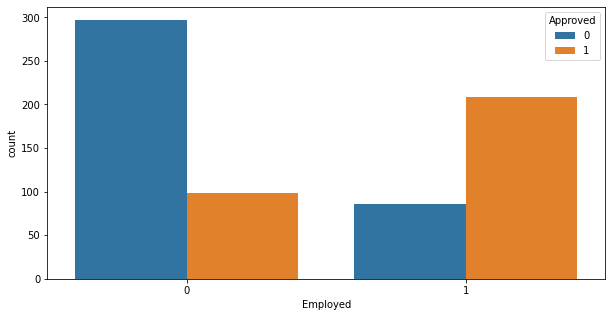

'Employed' is a Good Predictor
p_val=2.2272693453122814e-33

DriversLicense:


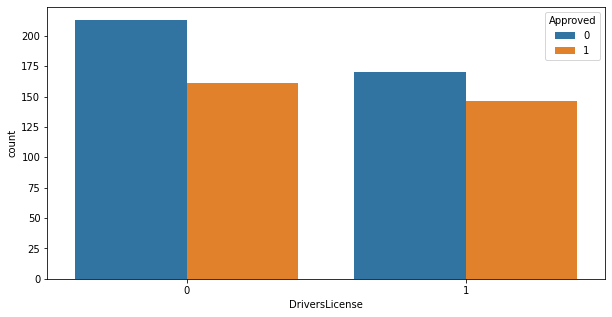

'DriversLicense'is a 'bad Predictor'
p_val=0.4061341323141693

Citizen:


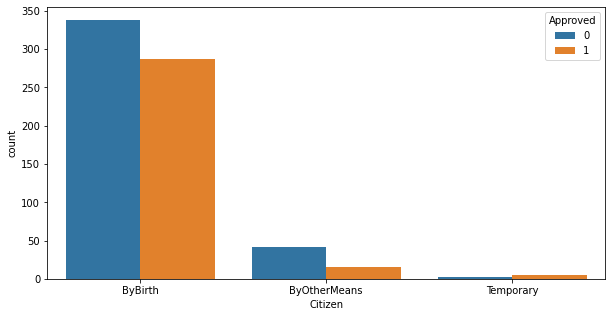

'Citizen' is a Good Predictor
p_val=0.01009429137045636

ZipCode:


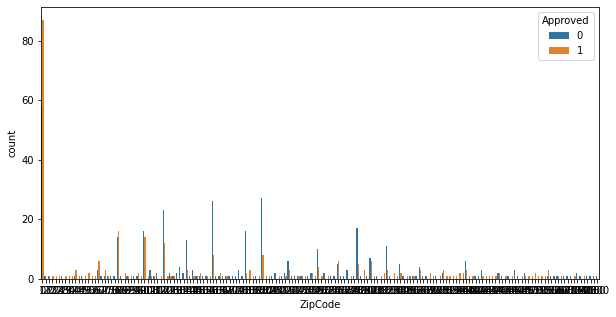

'ZipCode' is a Good Predictor
p_val=0.006354824252183887

Approved:


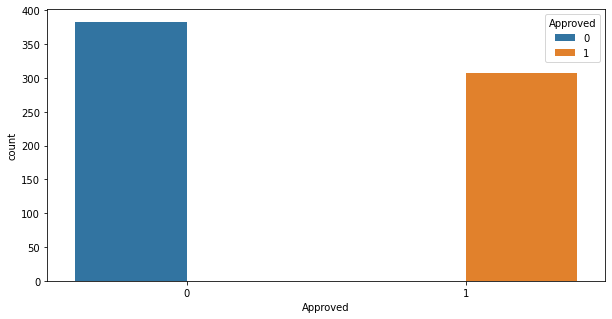

'Approved' is a Good Predictor
p_val=4.469841378183071e-152



In [71]:
for i in category:
     print(i+":")
     plt.figure(figsize=(10,5))
     sns.countplot(x=i,data=df,hue="Approved")
     plt.show()
     a=np.array(pd.crosstab(df.Approved,df[i]))
     (stats,p,dof,_)=chi2_contingency(a,correction=False)
     if p>0.05:
         print(Fore.RED + "'{}'is a 'bad Predictor'".format(i))
         print('p_val={}\n'.format(p))
     else:
         print(Fore.GREEN + "'{}' is a Good Predictor".format(i))
         print('p_val={}\n'.format(p))

## __Gender:__

"we see that majority of credit card holders are males " "since Gender is a bad predictor towards Approval we
drop the attribute"


In [72]:
df.drop(['Gender'],axis=1,inplace=True)

In [73]:
df

,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


# DriversLicense:

"we see that majority of credit card holders have DrivingLicense" "since DriversLicense is a bad predictor
towards Approval we drop the attribute"

In [74]:
df.drop(['DriversLicense'],axis=1,inplace=True)

In [75]:
df.columns

Index(['Age', 'Debt', 'Married', 'BankCustomer', 'Industry', 'Ethnicity',
       'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Citizen',
       'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [76]:
column_names=df.columns.tolist()
numeric =list(set(column_names)-set(category))

In [77]:
df.loc[:,numeric]

,CreditScore,Debt,Age,YearsEmployed,Income
0,1,0.000,30.83,1.25,0
1,6,4.460,58.67,3.04,560
2,0,0.500,24.50,1.50,824
3,5,1.540,27.83,3.75,3
4,0,5.625,20.17,1.71,0
...,...,...,...,...,...
685,0,10.085,21.08,1.25,0
686,2,0.750,22.67,2.00,394
687,1,13.500,25.25,2.00,1
688,0,0.205,17.92,0.04,750


CreditScore:


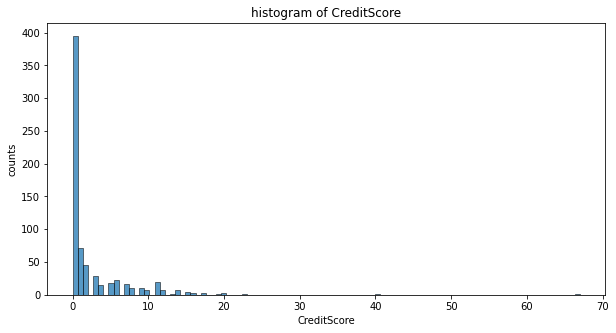

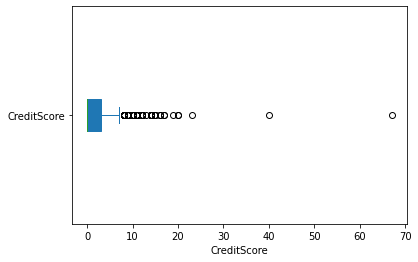

Debt:


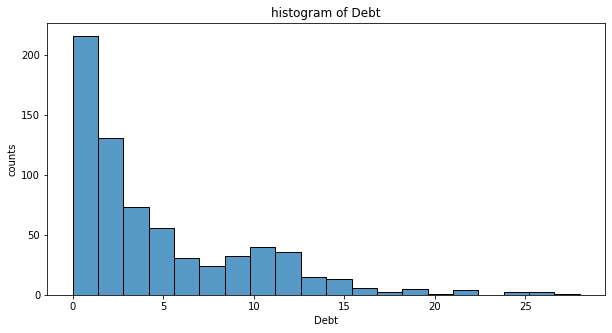

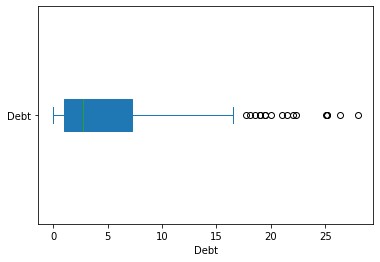

Age:


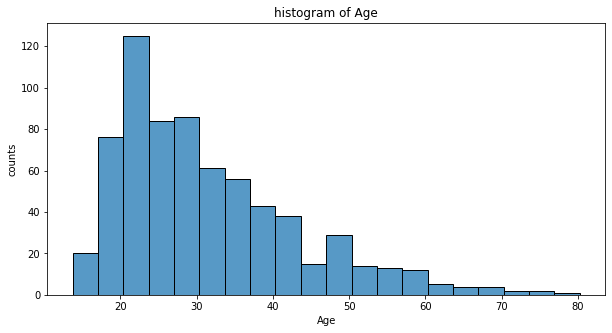

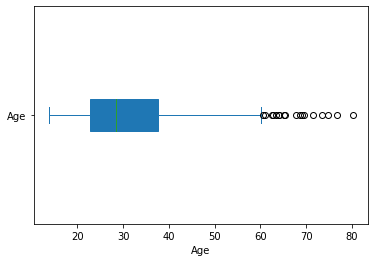

YearsEmployed:


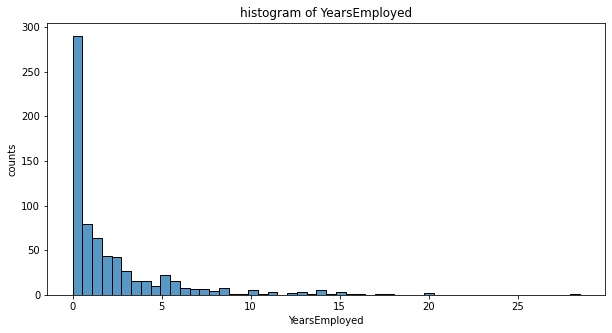

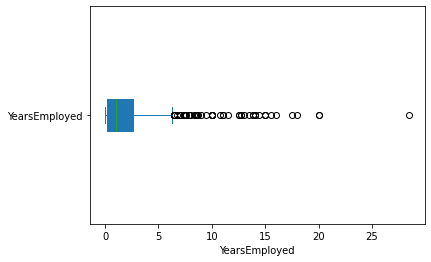

Income:


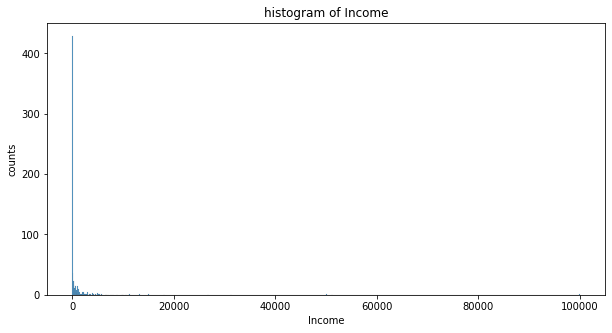

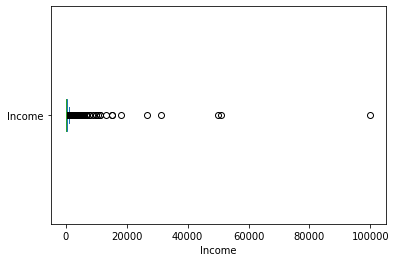

In [78]:
for i in numeric:
 print(i+':')
 plt.figure(figsize=(10,5))
 sns.histplot(df[i])
 plt.xlabel(i)
 plt.ylabel('counts')
 plt.title('histogram of ' + i)
 plt.show()
 df[i].plot.box(vert=False,patch_artist=True)
 plt.xlabel(i)
 plt.show()

In [79]:
iqr=iqr

CreditScore:


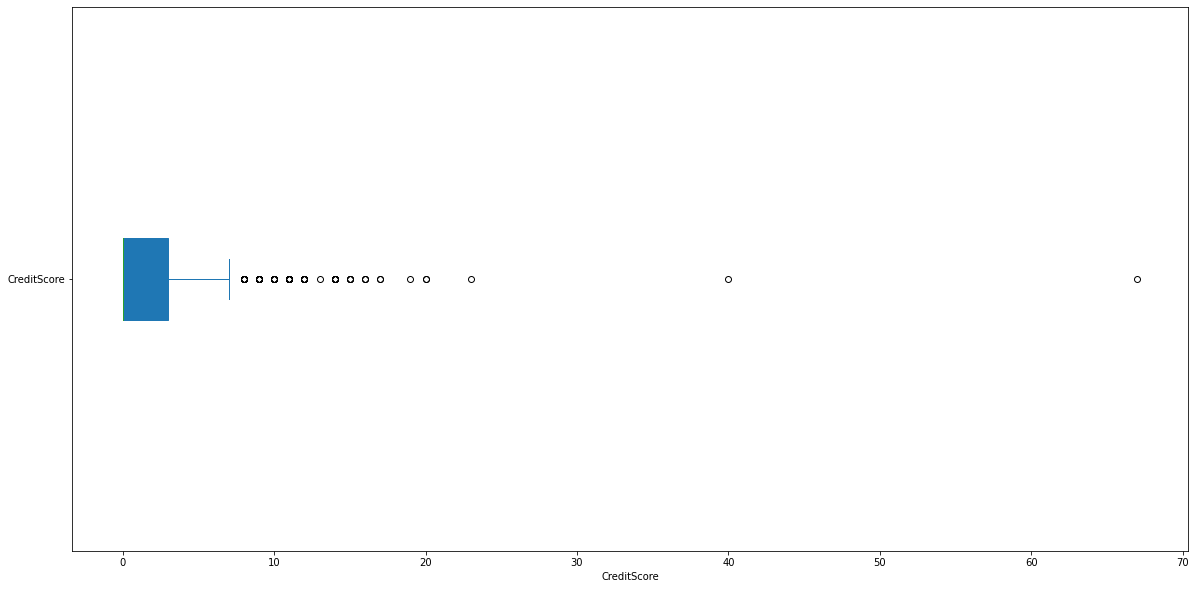

Left Limit:-4.5
Right Limit:7.5
iqr:3.0


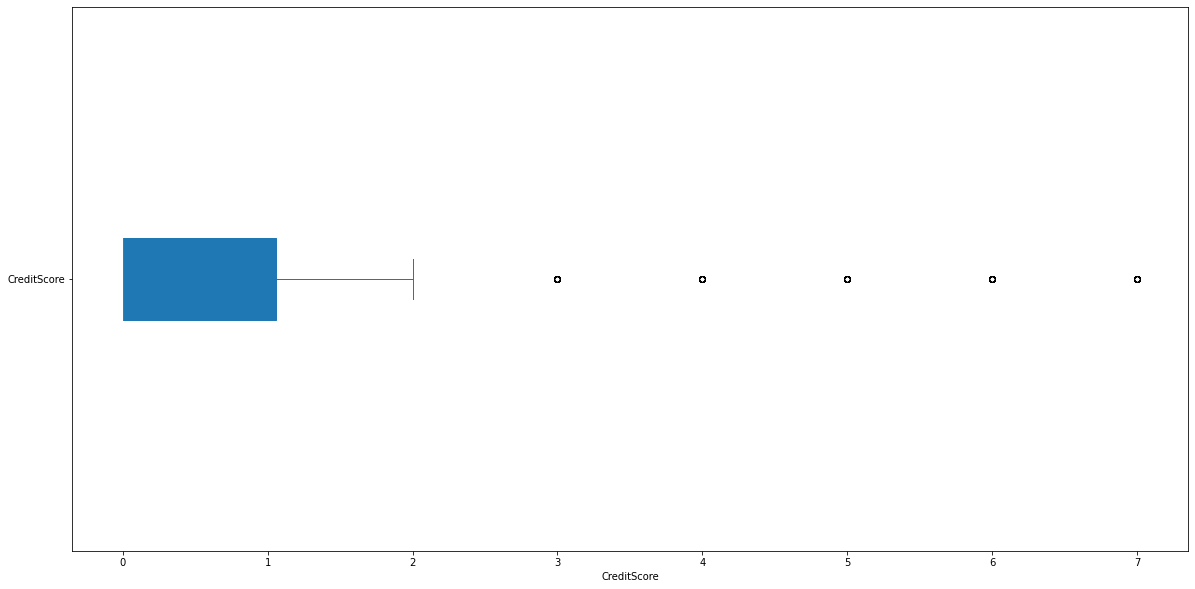

Debt:


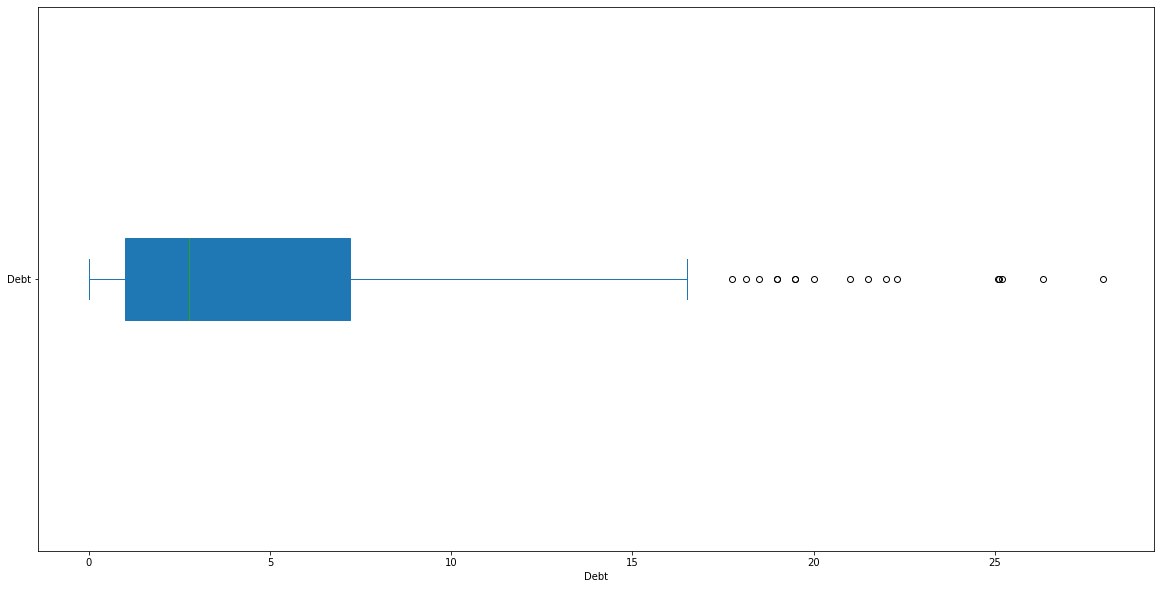

Left Limit:-8.31125
Right Limit:16.518749999999997
iqr:6.2075


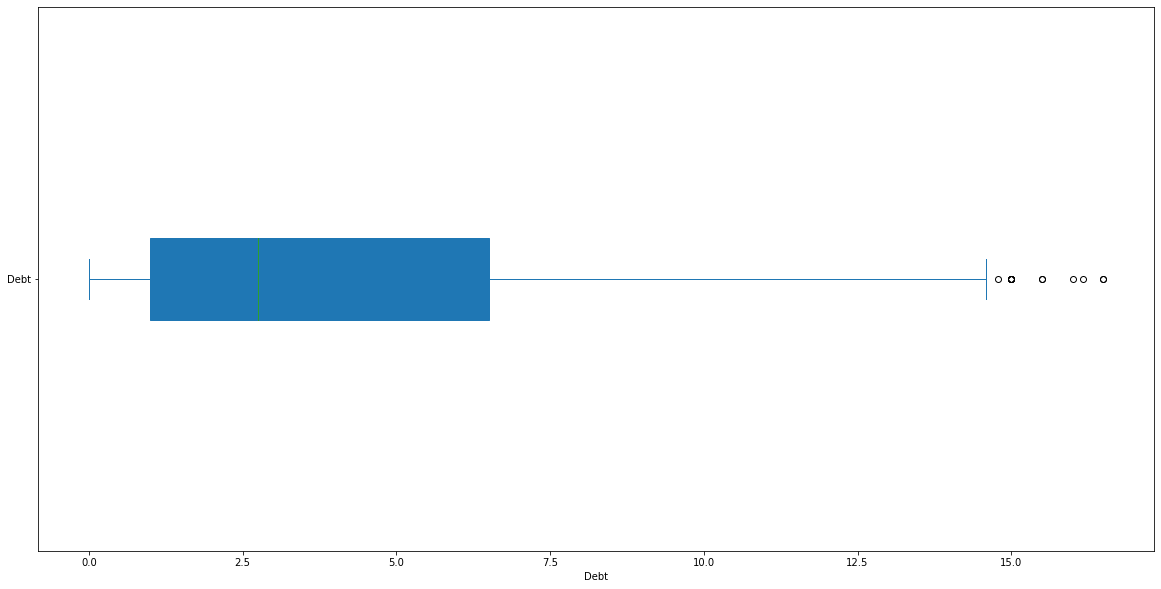

Age:


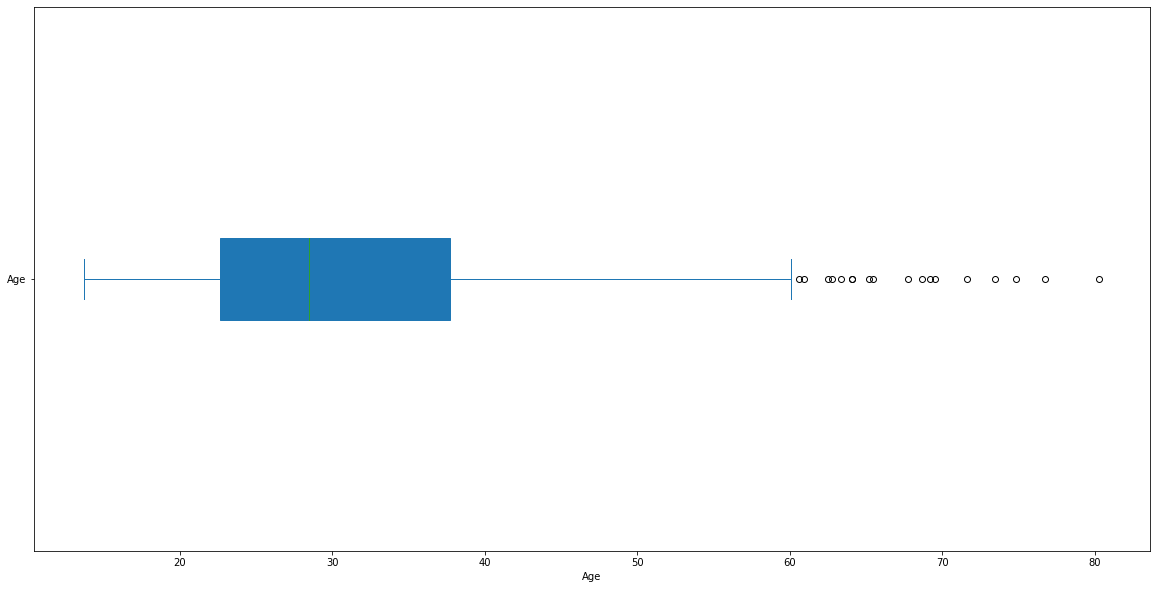

Left Limit:0.11375000000001023
Right Limit:60.26374999999999
iqr:15.037499999999994


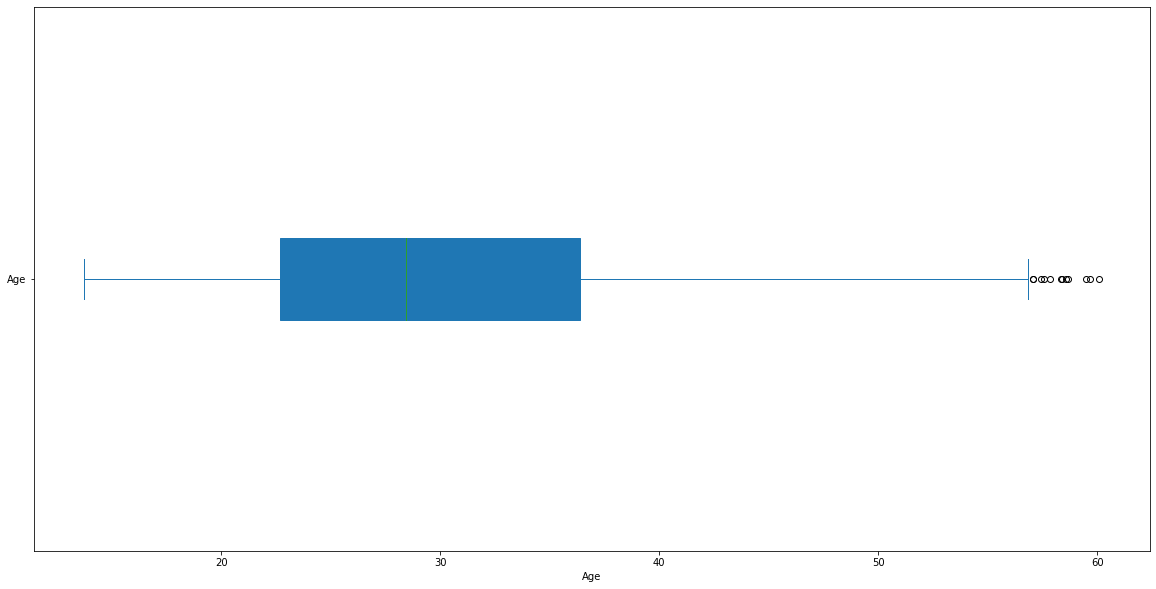

YearsEmployed:


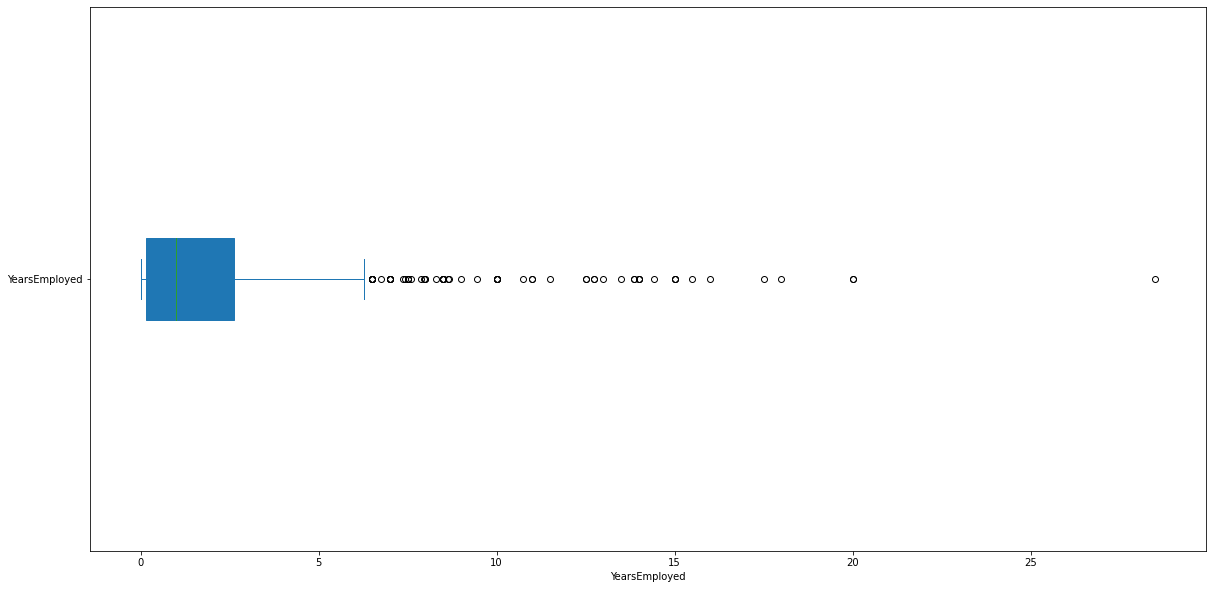

Left Limit:-3.525
Right Limit:6.3149999999999995
iqr:2.46


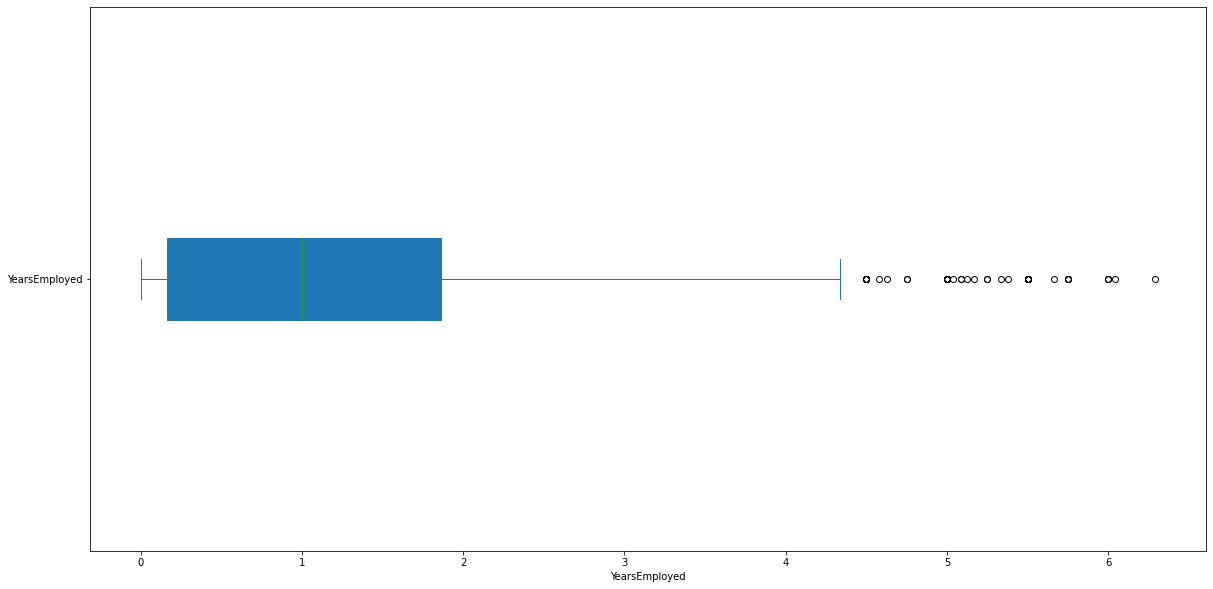

Income:


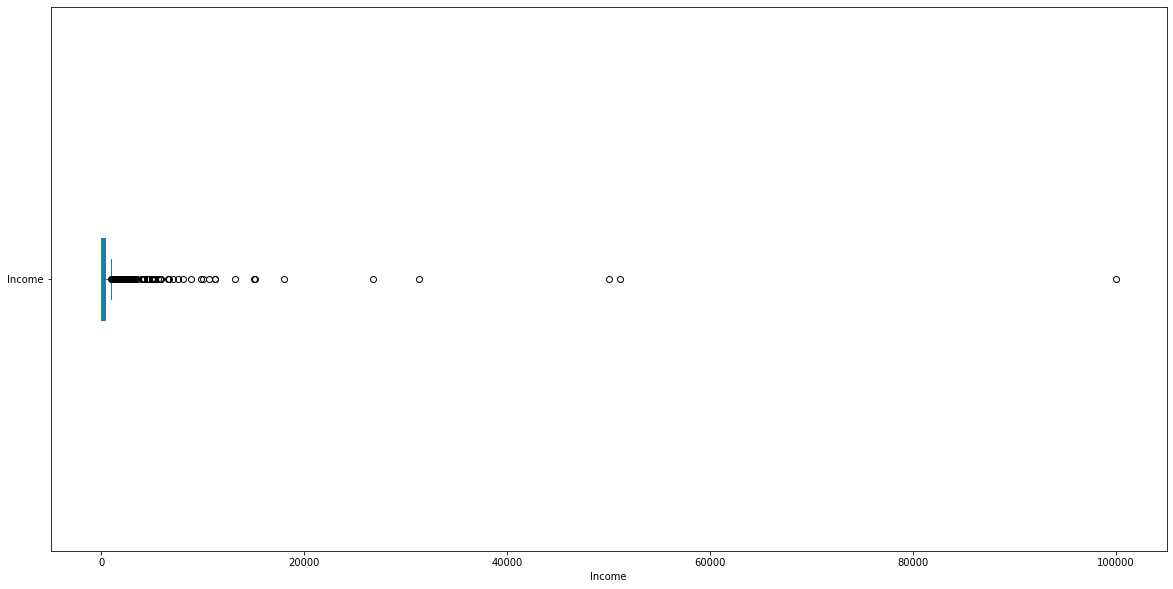

Left Limit:-593.25
Right Limit:988.75
iqr:395.5


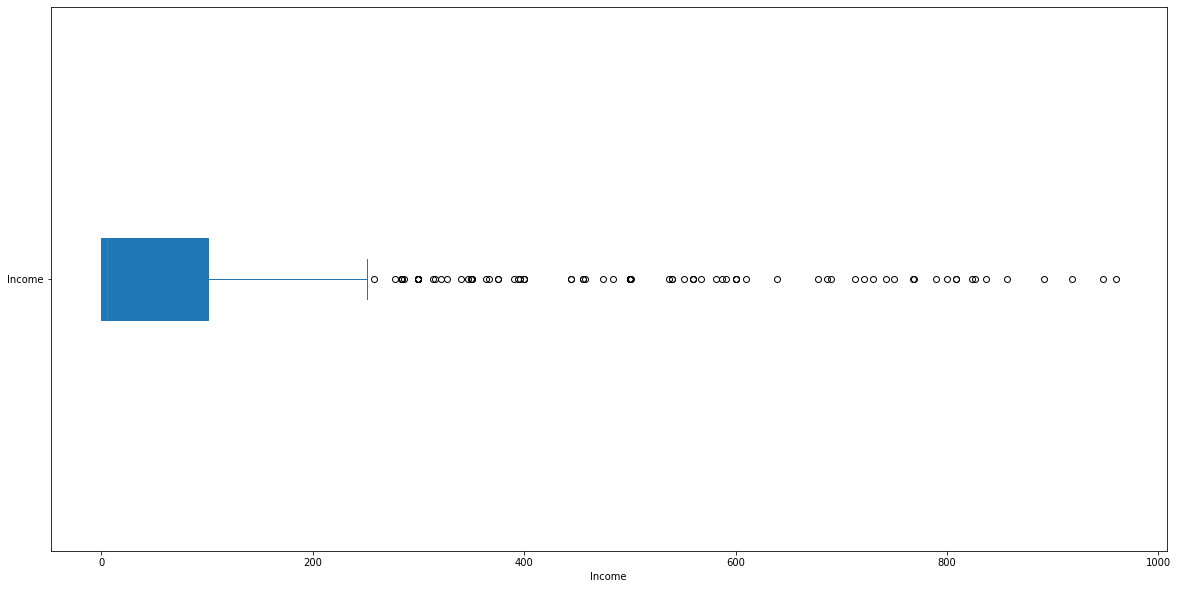

In [80]:
#The operations involved are outlier detection, setting outliers to NaN (Not a Number), 
# and imputing these missing values using a K-Nearest Neighbors (KNN) Imputer.
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

imputer = KNNImputer(n_neighbors=10)

for i in numeric:
 print(i+":")
 plt.figure(figsize=(20,10))
 df[i].plot.box(vert=False,patch_artist=True)
 plt.xlabel(i)
 plt.show()

 iqr = df[i].describe()['75%'] - df[i].describe()['25%']
 right_lim = df[i].quantile(0.75) + 1.5*iqr
 left_lim = df[i].quantile(0.25) - 1.5*iqr
 print('Left Limit:{}'.format(left_lim))
 print('Right Limit:{}'.format(right_lim))
 print('iqr:{}'.format(iqr))

 # Set outliers to NaN
 df.loc[(df[i] < left_lim) | (df[i] > right_lim), i] = np.nan

 # Perform KNN imputation
 df[[i]] = imputer.fit_transform(df[[i]])

 plt.figure(figsize=(20,10))
 df[i].plot.box(vert=False,patch_artist=True)
 plt.xlabel(i)
 plt.show()

 plt.show()

CreditScore:


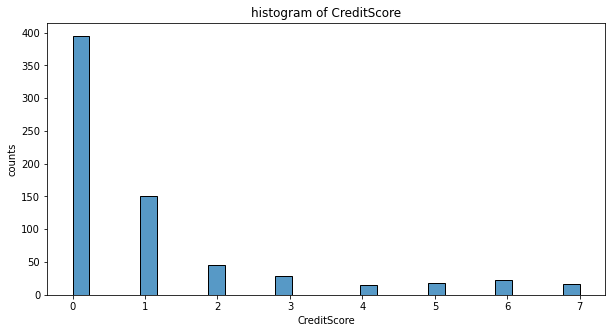

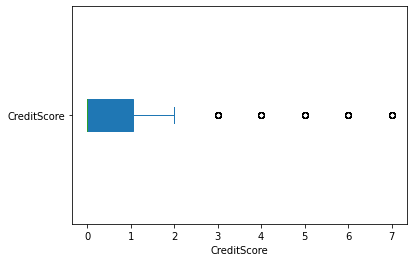

Debt:


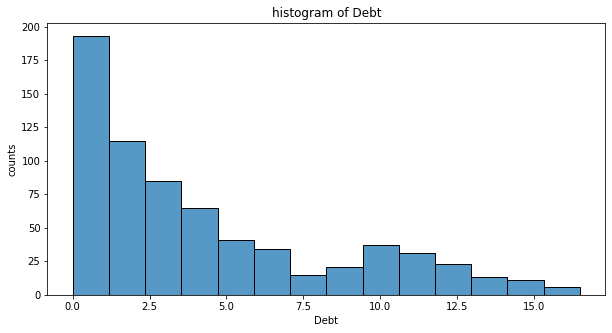

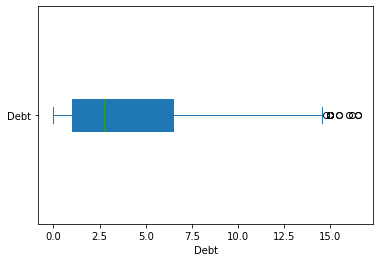

Age:


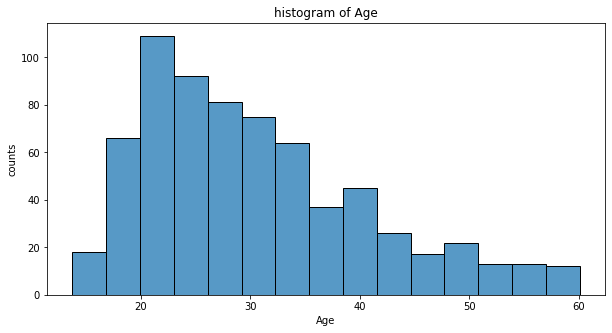

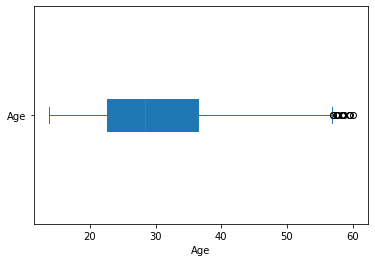

YearsEmployed:


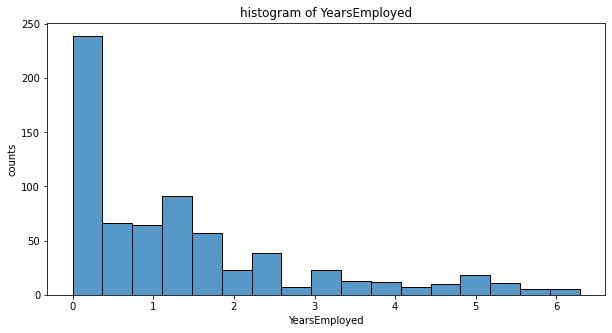

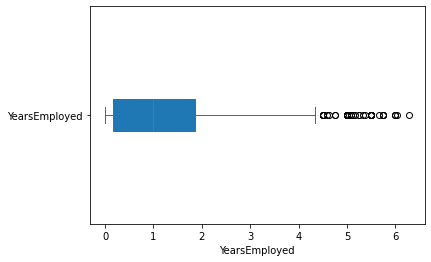

Income:


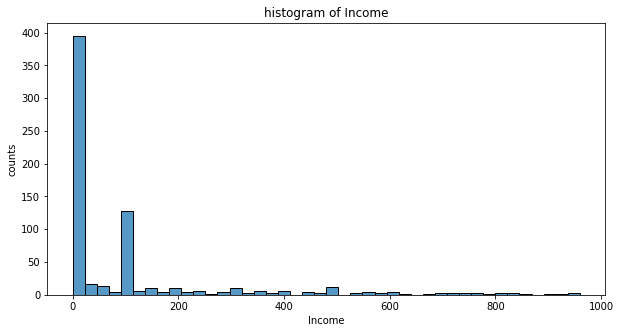

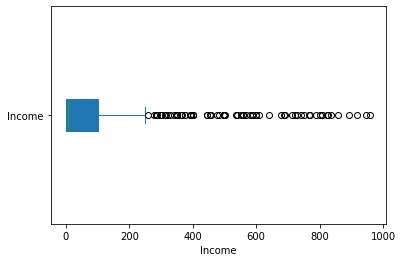

In [81]:
for i in numeric:
 print(i+":")
 plt.figure(figsize=(10,5))
 sns.histplot(df[i])
 plt.xlabel(i)
 plt.ylabel('counts')
 plt.title('histogram of '+i)
 plt.show()
 df[i].plot.box(vert=False,patch_artist=True)
 plt.xlabel(i)
 plt.show()

CreditScore:


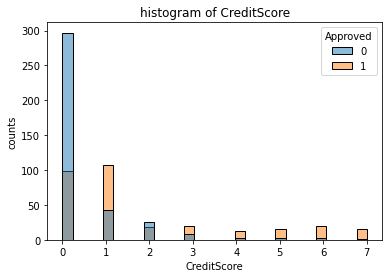

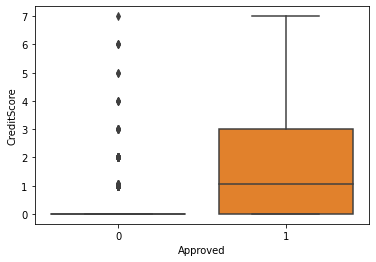

Debt:


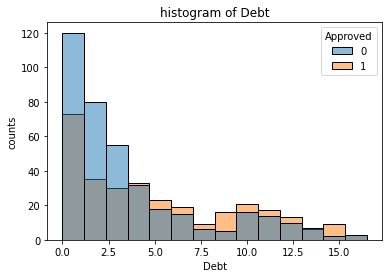

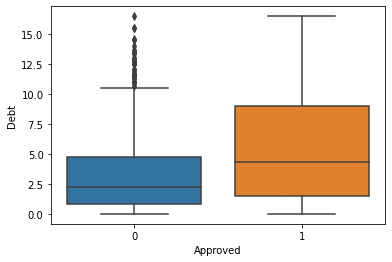

Age:


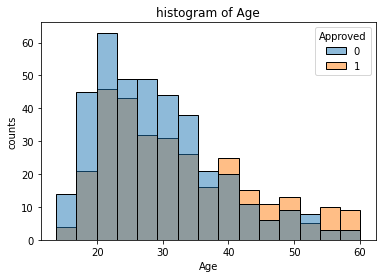

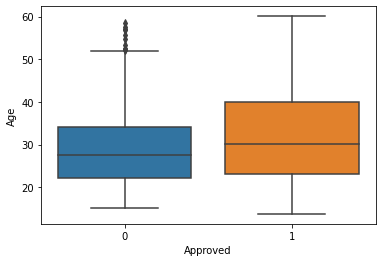

YearsEmployed:


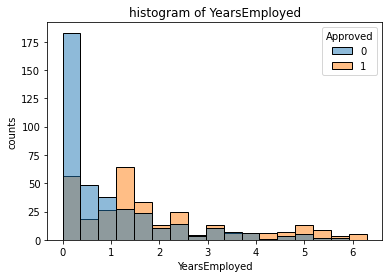

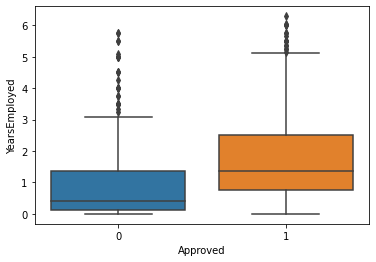

Income:


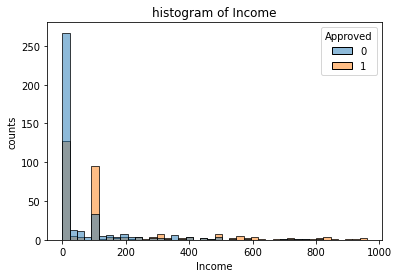

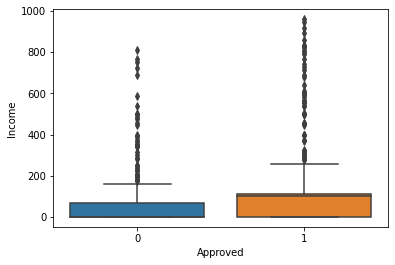

In [82]:
for i in numeric:
 print(i+":")
 sns.histplot(x=df[i],hue=df.Approved)
 plt.xlabel(i)
 plt.ylabel('counts')
 plt.title('histogram of '+ i)
 plt.show()
 sns.boxplot(y=df[i],x=df.Approved)
 plt.show()

# Statistical Testing using Anova:


In [83]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [84]:
for i in numeric:
 print("--------------------------------------------------------------------------------")
 print(i+":\n")
 print('ANOVA:\n')
 mod=ols(i+'~Approved',data=df).fit()
 aov_table=smf.stats.anova_lm(mod,type = 2)
 print(aov_table,'\n')
 print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
 p=aov_table['PR(>F)'][0]
 if p>0.05:
     print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
     print('Avg of this feature is same for both card approved group and not approved group')
     print("p_val = {}\n".format(p))
 else:
     print('TUKEY:\n')
     print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
     print('Avg of this feature is not same for both card approved group and not approved group')
     print('we need to perform Tuckey as atleast one category is different\n')
     print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
     tukey=pairwise_tukeyhsd(df[i],df.Approved,alpha=0.05)
     print(tukey,'\n')

--------------------------------------------------------------------------------
CreditScore:

ANOVA:

             df      sum_sq     mean_sq           F        PR(>F)
Approved    1.0   332.18887  332.188870  127.542552  2.987691e-27
Residual  688.0  1791.91915    2.604534         NaN           NaN 

Pvalue=2.9876909148266348e-27

TUKEY:

'CreditScore' is a 'good Predictor'

Avg of this feature is not same for both card approved group and not approved group
we need to perform Tuckey as atleast one category is different

'CreditScore' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   1.3962   0.0 1.1535 1.6389   True
------------------------------------------------- 

--------------------------------------------------------------------------------
Debt:

ANOVA:

             df        sum_sq     mean_sq          F        PR(>F)
Approved    1.0    

In [85]:
from sklearn.preprocessing import OneHotEncoder
import pickle
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Save the OneHotEncoder to a pickle file
with open("OH_encoder.pkl", "wb") as f:
    pickle.dump(OH_encoder, f)

Categorical variables:
['Industry', 'Ethnicity', 'Citizen']
No. of. categorical features:  3


In [86]:
df_final.head()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,ZipCode,Income,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,30.83,0.000,1,1,1.25,1,1,1.0,202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,58.67,4.460,1,1,3.04,1,1,6.0,43,560.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24.50,0.500,1,1,1.50,1,0,0.0,280,824.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27.83,1.540,1,1,3.75,1,1,5.0,100,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,20.17,5.625,1,1,1.71,1,0,0.0,120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Variance inflation factor (VIF) Calculation

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
x = df_final[['Age','Debt','YearsEmployed','CreditScore','Income']]

In [89]:
vif_data=pd.DataFrame()

In [90]:
vif_data['features']=x.columns

In [91]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [92]:
vif_data

,features,VIF
0,Age,2.678080
1,Debt,2.024592
2,YearsEmployed,2.080424
3,CreditScore,1.485264
4,Income,1.339038


In [93]:
df_final

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,ZipCode,Income,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,30.83,0.000,1,1,1.250000,1,1,1.0,202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,58.67,4.460,1,1,3.040000,1,1,6.0,43,560.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24.50,0.500,1,1,1.500000,1,0,0.0,280,824.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27.83,1.540,1,1,3.750000,1,1,5.0,100,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,20.17,5.625,1,1,1.710000,1,0,0.0,120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,1.250000,0,0,0.0,260,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
686,22.67,0.750,1,1,2.000000,0,1,2.0,200,394.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
687,25.25,13.500,0,0,2.000000,0,1,1.0,200,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
688,17.92,0.205,1,1,0.040000,0,0,0.0,280,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Creating model

In [94]:
y = df_final['Approved']
x = df_final.drop(columns=['Approved'])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error

In [98]:
model=LogisticRegression(solver='liblinear',random_state=123)

In [99]:
clf = model.fit(x_train, y_train)
# Save the model using pickle
with open('credit_card_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [100]:
clf.score(x_test,y_test)

0.8599033816425121

In [101]:
clf.intercept_

array([-1.26866571])

In [102]:
clf.coef_

array([[-4.77241404e-03, -2.04769783e-02,  2.88782081e-02,
         5.47929512e-01,  2.59143275e-01,  3.14760882e+00,
         8.75191135e-01,  6.62344559e-02, -3.09356990e-03,
         2.28116243e-03, -1.40880338e-01, -1.04601482e+00,
        -4.95584363e-01,  3.98815394e-01, -4.65527166e-02,
        -6.96624667e-01, -9.88291022e-01,  1.12870584e-01,
         1.43208000e+00,  7.54200354e-03, -6.11555797e-01,
        -3.22731981e-01,  1.49667483e-01,  9.78594526e-01,
        -3.77128662e-01, -5.95382751e-02, -3.41537281e-01,
        -3.90165366e-02, -4.51444954e-01, -1.25421955e+00,
        -4.95994840e-01,  4.81548683e-01]])

# Creating confusion matrix

In [103]:
from sklearn import metrics

In [104]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[97 12]
 [17 81]]


In [105]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       109
           1       0.87      0.83      0.85        98

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



**Precision:** Precision is the number of true positives divided by the sum of true positives and false positives. It's a measure of how many of the positive predictions were actually correct. In our case, for class 0 it's 0.89 and for class 1 it's 0.87, which means that the model's predictions for both classes are fairly precise.

**Recall:** Recall (also known as sensitivity or true positive rate) is the number of true positives divided by the sum of true positives and false negatives. It's a measure of how many of the actual positives were correctly identified. In our case, for class 0 it's 0.88 and for class 1 it's 0.88, which means that the model is doing a good job at catching the positive instances for both classes.

**F1-Score:** The F1 score is the harmonic mean of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. In our case, for both classes it's around 0.87-0.88, which is a good score and indicates a balanced model in terms of precision and recall.

**Support:** The support is the number of actual occurrences of the class in the specified dataset. In our case, for class 0 it's 109 and for class 1 it's 98, which means the dataset is slightly imbalanced, but not too much.

**Accuracy:** Accuracy is the ratio of correctly predicted observations to the total observations. In our case, it's 0.88, which means the model correctly predicted 88% of all instances.

**Macro avg:** The macro average (for precision, recall, F1) is the average score without considering the class imbalance. It's calculated by simply averaging the scores of all classes.

**Weighted avg:** The weighted average (for precision, recall, F1) is calculated by taking the average of each metric, but giving a weight to each class proportional to its size (i.e., its support).

# ROC curve

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob=clf.predict_proba(x_test)
print(y_pred_prob)

[[0.97182548 0.02817452]
 [0.05682874 0.94317126]
 [0.89764185 0.10235815]
 [0.12470504 0.87529496]
 [0.98864959 0.01135041]
 [0.02362189 0.97637811]
 [0.98297165 0.01702835]
 [0.15419547 0.84580453]
 [0.97732259 0.02267741]
 [0.39377527 0.60622473]
 [0.87382958 0.12617042]
 [0.43235816 0.56764184]
 [0.43572549 0.56427451]
 [0.14206586 0.85793414]
 [0.1614757  0.8385243 ]
 [0.17811536 0.82188464]
 [0.09352936 0.90647064]
 [0.88200481 0.11799519]
 [0.15855206 0.84144794]
 [0.15572787 0.84427213]
 [0.1948914  0.8051086 ]
 [0.77315265 0.22684735]
 [0.50313667 0.49686333]
 [0.10890954 0.89109046]
 [0.14547576 0.85452424]
 [0.4680303  0.5319697 ]
 [0.14975605 0.85024395]
 [0.62721964 0.37278036]
 [0.70840586 0.29159414]
 [0.95906025 0.04093975]
 [0.83183127 0.16816873]
 [0.05365692 0.94634308]
 [0.94979779 0.05020221]
 [0.39473673 0.60526327]
 [0.45513286 0.54486714]
 [0.99127243 0.00872757]
 [0.11434604 0.88565396]
 [0.86389223 0.13610777]
 [0.61812913 0.38187087]
 [0.18895107 0.81104893]


In [107]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

In [108]:
roc_auc=roc_auc_score(y_test,y_pred_prob[:,1])

In [109]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

5.049593953064722

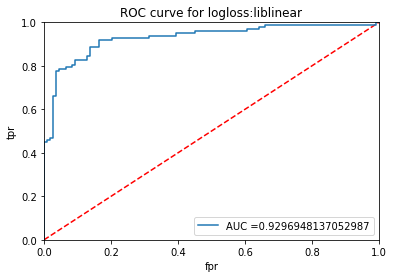

In [110]:
plt.title('ROC curve for logloss:liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC ='+str(roc_auc))
plt.legend(loc='best')
plt.show()

In [111]:
unique_industries = df["Industry"].unique()
print(unique_industries)

['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']


In [112]:
unique_ethnicity = df["Ethnicity"].unique()
print(unique_ethnicity)

['White' 'Black' 'Asian' 'Latino' 'Other']


In [113]:
unique_citizen = df["Citizen"].unique()
print(unique_citizen)

['ByBirth' 'ByOtherMeans' 'Temporary']
